## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [5]:
X.isnull().sum().sum()

0

In [6]:

X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state = 0)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [10]:
neighbors = [1, 3, 5, 10, 15, 25]
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train[['alcohol', 'magnesium']])
X_test_scaled =sc.transform(X_test[['alcohol', 'magnesium']])

In [11]:
clfs = []

for n in neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric = 'euclidean')
    clf.fit(X_train_scaled, y_train)
    clfs.append(clf)
    y_predicted = clf.predict(X_test_scaled)
    print(f"Accuracy with {n} neighbors - ", np.mean(y_test == y_predicted))

Accuracy with 1 neighbors -  0.6666666666666666
Accuracy with 3 neighbors -  0.7777777777777778
Accuracy with 5 neighbors -  0.7222222222222222
Accuracy with 10 neighbors -  0.7777777777777778
Accuracy with 15 neighbors -  0.7962962962962963
Accuracy with 25 neighbors -  0.7962962962962963


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [12]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [13]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [14]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

X_train.to_numpy()

X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
145,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0
117,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0
47,13.90,1.68,2.12,16.0,101.0,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985.0


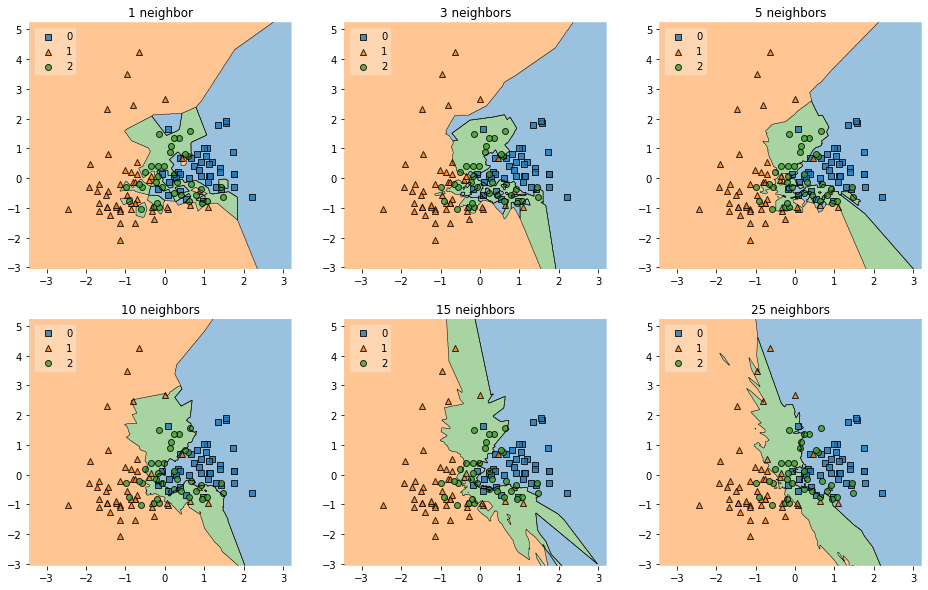

In [15]:
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(16,10))
labels = ['1 neighbor', '3 neighbors', '5 neighbors', '10 neighbors', '15 neighbors', '25 neighbors']

for clf, lab, grd in zip(clfs, 
                       labels, 
                       itertools.product([0,1], [0,1,2], repeat = 1)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train_scaled[:, [0, 1]], clf = clf, y=y_train, legend=2)
    ax.set_title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

#### Вывод

1.3) Точность классификации на обучающей выборке увеличивалась с увеличением числа соседей. Выборка стала достаточно точной при n_neighbors = 5. В дальнейшем точность не увеличивалась, но использование большего числа соседей приводит к переобучению модели

1.5) При 1 ближайшем соседе решающая поверхность имела множество острых углов и была более подвержена выбросам. При 25 ближайших соседях решающая поверхность стала очень простой

Оптимальное число соседей для данной задачи - 5 или 10. Это число соседей позволяет достичь хорошей точности классификации на тестовой выборке и при этом обеспечивает плавную и устойчивую решающую поверхность, которая устойчива к шумам и выбросам

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

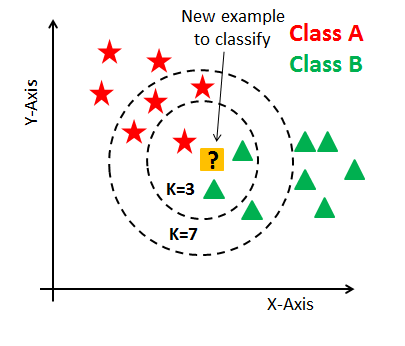

In [16]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        self.X = X
        y_pred = []
        
        for x_test in self.X:
            distances = np.sqrt(np.sum((self.X_train - x_test)**2, axis = 1)) 
            neighbors = np.argsort(distances)[:self.k]
            nearest_outcomes = self.y_train[neighbors]
            outcome = Counter(nearest_outcomes).most_common(1)[0][0]
            y_pred.append(outcome)
        
        return np.array(y_pred)


In [17]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [18]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [122]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [123]:
data.isnull().sum().sum()

0

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [124]:
data.drop('Unnamed: 0', inplace = True, axis = 1)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [125]:
data.dtypes # проверили типы данных
corr_matrix = data.corr()
corr_matrix['price'].sort_values()


depth   -0.010647
table    0.127134
z        0.861249
y        0.865421
x        0.884435
carat    0.921591
price    1.000000
Name: price, dtype: float64

- Коррелируют больше всего признаки 'carat' , 'x', 'y'


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [126]:
data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'])

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['price'], axis=1), data['price'], test_size=0.3, random_state=41) 

X_train

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
14111,1.00,63.0,58.0,6.25,6.35,3.97,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
50533,0.57,62.2,59.0,5.29,5.26,3.28,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5520,1.00,61.2,59.0,6.38,6.42,3.92,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
15079,1.32,64.8,58.0,6.90,6.83,4.45,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
39387,0.31,61.2,59.0,4.38,4.35,2.67,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53491,0.71,61.0,58.0,5.71,5.87,3.53,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
41281,0.58,60.9,57.0,5.40,5.44,3.30,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
20450,1.20,62.1,54.0,6.77,6.73,4.19,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
931,0.72,61.8,56.0,5.75,5.81,3.57,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
columns = ['carat', 'depth', 'table', 'x', 'y', 'z']
scaler = StandardScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
data

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [131]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
mse_train= mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE на тренировочной выборке: {mse_train}")
print(f"MSE на тестовой выборке: {mse_test}")

MSE на тренировочной выборке: 1234877.526113139
MSE на тестовой выборке: 1378046.960236092


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [132]:
tangible_features = lr.coef_[[0,1,2,3,4,5]] # оставляем вещественные признаки

quantile_75 = np.quantile(np.abs(tangible_features), 0.75) # будем оценивать выделяющиеся параметры через 75% квантиль
outstanding = np.array([])

for i in range(len(tangible_features)):
    if np.abs(tangible_features[i]) >= quantile_75 and X_train.columns[i] != 'const':
        outstanding = np.append(outstanding, X_train.columns[i])
        
print(f'Признаки, не лежащие в рамках 75% квантиля - {outstanding}')

Признаки, не лежащие в рамках 75% квантиля - ['carat' 'x']


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [133]:
from sklearn.linear_model import Lasso, Ridge

print()
print("Basic - ", lr.coef_)

lasso = Lasso(10)
lasso.fit(X_train, y_train)
print("Lasso - ", lasso.coef_)

ridge = Ridge(10)
ridge.fit(X_train, y_train)
print("Ridge - ", ridge.coef_)


Basic -  [ 5.45225181e+03 -9.28437602e+01 -6.35358553e+01 -1.21515446e+03
 -3.59041035e+00 -6.32585905e+01 -6.11589005e+02  8.95697229e+00
  2.55715688e+02  1.88023367e+02  1.58892978e+02  8.24369694e+02
  6.14520823e+02  5.53250919e+02  3.40975923e+02 -1.45002272e+02
 -6.42773406e+02 -1.54534168e+03 -3.68567822e+03  1.51188670e+03
 -1.57736097e+02 -1.13688370e+03  7.41238718e+02  4.42607956e+02
  1.16474610e+03  1.11981854e+03]
Lasso -  [ 4966.42278225  -100.44555522   -83.60728246  -788.02257116
    -0.           -80.9217241   -468.32782239   -32.29317163
    78.6527807      0.             0.           335.7867941
   167.09957203   117.84088067     0.          -425.75264895
  -851.74753502 -1653.84436135 -3440.51493458   684.12051728
  -624.73510339 -1543.3193695    144.06883488   -15.02275358
   502.09619616   508.19184787]
Ridge -  [ 5.41048717e+03 -8.92249537e+01 -6.38817639e+01 -1.15706780e+03
 -3.80710154e+00 -8.29317158e+01 -6.14128662e+02  9.01888909e+00
  2.56689769e+02  1.8

- В случае с обычной линейной регрессией не было сильно больших коэффициентах, поэтому нельзя говорить о мультиколлинеарности. Более того, в случае Lasso некоторые признаки стали иметь сравнительно огромный вес, а другие занулились

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/Users/slitasov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.342e+07, tolerance: 5.989e+07
  model = cd_fast.enet_coordinate_descent(


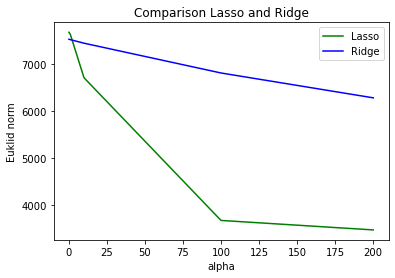

In [139]:
alpha_list = [0.1, 1, 10, 100, 200]

lasso_list = []
ridge_list = []

for alpha in alpha_list:
    trained = Lasso(alpha).fit(X_train, y_train)
    lasso_list.append(np.linalg.norm(trained.coef_))
    
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    ridge_list.append(np.linalg.norm(ridge.coef_))

plt.figsize = (40,20)
plt.plot(alpha_list, lasso_list, label="Lasso", color = 'green')
plt.plot(alpha_list, ridge_list, label="Ridge", color = 'blue')
plt.title("Comparison Lasso and Ridge")
plt.xlabel("alpha")
plt.ylabel("Euklid norm")
plt.legend()
plt.show()

* При выборе весов Lasso регрессия склонна занулять некоторые признаки и сильно увеличивать другие, в то время как Ridge регрессия склонна сбалансированно занижать все веса. Можно сказать, что Lasso регрессия действует более агрессивно

* Lasso регрессия используется для отбора признаков потому что она зануляет коэффициенты при малозначимых признаках

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [141]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas = alpha_list, cv=5)
lasso_cv.fit(X_train, y_train)

means = lasso_cv.mse_path_.mean(axis = 1)
min_means = lasso_cv.mse_path_.mean(axis = 1).min()
optimal_alpha = lasso_cv.alphas_[means.argmin()]

print(f'Optimal alpha is {optimal_alpha}')

/Users/slitasov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1235781455.8310318, tolerance: 48235041.79781576
  model = cd_fast.enet_coordinate_descent_gram(


Optimal alpha is 1.0


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [136]:
lasso = Lasso(alpha=optimal_alpha)
coefs = lasso.fit(X_train, y_train).coef_

for i, q in enumerate(coefs):
    print(f'{X_train.columns[i]} коэффициент - {q}')

carat коэффициент - 5405.048183225316
depth коэффициент - -93.86155509710534
table коэффициент - -65.37499157296135
x коэффициент - -1176.4381806945105
y коэффициент - -1.0133450361148257
z коэффициент - -64.46440636243462
cut_Fair коэффициент - -741.7913530705652
cut_Good коэффициент - -139.97618856433473
cut_Ideal коэффициент - 93.39674163001945
cut_Premium коэффициент - 22.73029537864802
cut_Very Good коэффициент - 0.0
color_D коэффициент - 469.17536966613443
color_E коэффициент - 263.33075844865
color_F коэффициент - 203.236229787398
color_G коэффициент - 0.0
color_H коэффициент - -479.5629611497005
color_I коэффициент - -970.2776118116038
color_J коэффициент - -1862.879349837831
clarity_I1 коэффициент - -4135.649150142806
clarity_IF коэффициент - 954.3701569216604
clarity_SI1 коэффициент - -679.0795087691048
clarity_SI2 коэффициент - -1652.148880076422
clarity_VS1 коэффициент - 206.9114480593238
clarity_VS2 коэффициент - -77.74812886145543
clarity_VVS1 коэффициент - 623.6668845308

- Наиболее информативным признаком является carat - вес бриллианта напрямую связан с его стоимостью
- Вторым по информативнсти является признак clarity_I1. Действительно, низкая чистота бриллианта негативно влияет на его стоимость

- Первым по неинформативности вляется color_G коэффициент - средний по частоте цвет, не сильно помогает нам найти цену. Ничего необычного
- Удивительно, что cut_very_good тоже является неинформативным

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [146]:
print(f'MSE на тестовой выборке по Lasso равен {min_means}')
print(f"MSE на тестовой выборке по линейной регрессии равен: {mse_test}")

MSE на тестовой выборке по Lasso равен 1237776.8308052015
MSE на тестовой выборке по линейной регрессии равен: 1378046.960236092
